In [0]:
import os
import pandas as pd
import numpy as np
import json
from google.colab import files
import io
from keras import layers
from keras import models
from keras import applications
from keras import optimizers
import keras

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Please change the path to the desired video to be tested.


In [5]:
i=1
path='/content/drive/My Drive/results data/newdata/15n45s.json'
#path='/content/1'
json_files=[pos_json for pos_json in os.listdir(path) if pos_json.endswith('.json')]
print('Found: ',len(json_files),'json keypoint frame files')
a=json.load(open(path+'/'+json_files[0]))
b=a['people']
q=b[0]['pose_keypoints_2d']
s=[p for p in q if p>1]
train=pd.DataFrame([s])
for j in range(1,len(json_files)):
    a=json.load(open(path+'/'+json_files[j]))
    b=a['people']
    if len(b)>0:
        q=b[0]['pose_keypoints_2d']
        s=[p for p in q if p>1]
        s=pd.DataFrame([s])
        train=train.append(s)
    else:
        continue

Found:  1813 json keypoint frame files


In [0]:
train=train.fillna(method='ffill')
train=train.fillna(0)
y,x=train.shape
s=np.zeros(y)
s=pd.DataFrame(s)

for i in range(50):
    y,x=train.shape
    if x!=50:
        train[x]=s
        x=x+1
    if y<90:
        train=train.append(train.iloc[y-1])

for i in range(50):
    train.iloc[:,i]=train.iloc[:,i]/train.iloc[:,i].max()

In [7]:
train=train.fillna(method='ffill')
train=train.fillna(0)
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.783669,0.733928,0.812928,0.694537,0.664499,0.788700,0.752859,0.817096,0.896853,0.899346,0.553265,0.660555,0.676383,0.516105,0.842764,0.455708,0.734202,0.682531,0.572794,0.749288,0.751358,0.505288,0.929135,0.485756,0.505790,0.637207,0.750917,0.526842,0.908719,0.582684,0.204020,0.724832,0.207530,0.572216,0.179393,0.698493,0.196164,0.490655,0.967445,0.471807,0.965816,0.467001,0.925119,0.551455,0.993613,0.458079,1.000000,0.478588,0.0,0.0
0,0.789309,0.717504,0.812981,0.702128,0.667998,0.788852,0.755572,0.820198,0.896716,0.905629,0.550123,0.665399,0.671119,0.520418,0.842605,0.459693,0.731910,0.704185,0.565868,0.785598,0.649889,0.495204,0.483611,0.537780,0.644679,0.548472,0.210562,0.664507,0.206572,0.628486,0.183483,0.785131,0.202740,0.507288,0.179393,0.698493,0.196164,0.490655,0.967445,0.471807,0.965816,0.467001,0.925119,0.551455,0.993613,0.458079,1.000000,0.478588,0.0,0.0
0,0.783865,0.713439,0.812826,0.702041,0.664633,0.791995,0.744622,0.820327,0.899240,0.899305,0.550027,0.665397,0.673786,0.520510,0.847786,0.451615,0.606969,0.682513,0.439610,0.763792,0.464977,0.542027,0.600113,0.472632,0.731889,0.544702,0.205742,0.671611,0.206502,0.628591,0.189803,0.777620,0.204339,0.510524,0.179393,0.698493,0.196164,0.490655,0.967445,0.471807,0.965816,0.467001,0.925119,0.551455,0.993613,0.458079,1.000000,0.478588,0.0,0.0
0,0.772424,0.725596,0.803786,0.698280,0.661053,0.791955,0.750066,0.823505,0.899248,0.889958,0.543616,0.665282,0.676367,0.520567,0.852883,0.447562,0.777359,0.678903,0.593554,0.752881,0.651517,0.709083,0.921283,0.661434,0.552629,0.617969,0.655465,0.526772,0.722932,0.559557,0.196068,0.713373,0.202754,0.558523,0.174787,0.705227,0.194587,0.480903,0.720633,0.528991,0.962657,0.782585,0.945830,0.720960,0.993613,0.458079,1.000000,0.478588,0.0,0.0
0,0.755890,0.725631,0.794631,0.702149,0.660875,0.795463,0.739144,0.820387,0.899282,0.883632,0.533995,0.675036,0.679004,0.524812,0.865501,0.455599,0.777344,0.675336,0.591814,0.760203,0.746410,0.682418,0.919710,0.654967,0.547758,0.606410,0.750895,0.540854,0.932321,0.571234,0.194574,0.709818,0.197999,0.565357,0.173239,0.708550,0.193087,0.490650,0.970531,0.475316,0.970454,0.470464,0.960154,0.551636,0.984062,0.792360,0.982429,0.811675,0.0,0.0


In [0]:
x,y=train.shape
train=train.iloc[:90*int(x/90),:]
train=train.values
train=train.reshape(int(x/90),90,50)

Please change the path of the model.

In [9]:
model=keras.models.load_model('/content/wall final')

In [0]:
y=model.predict(train)

In [11]:
y

array([[0.97986627],
       [0.97610945],
       [0.9729358 ],
       [0.9739709 ],
       [0.45766622],
       [0.1771079 ],
       [0.80237955],
       [0.6971162 ],
       [0.9737211 ],
       [0.28663787],
       [0.71614397],
       [0.9498672 ],
       [0.78537047],
       [0.05813858],
       [0.01754141],
       [0.5458075 ],
       [0.7290286 ],
       [0.7105121 ],
       [0.51092917],
       [0.7300551 ]], dtype=float32)

In [12]:
p=[]
for i in y:
    if i<0.5:
        p.append(0)
        print(0)
    else:
        p.append(1)
        print(1)

1
1
1
1
0
0
1
1
1
0
1
1
1
0
0
1
1
1
1
1


In [0]:
l=[]
for i in p:
    for j in range(0,3):
        l.append(i)
        


Graph for 60 seconds.

Text(0, 0.5, 'action')

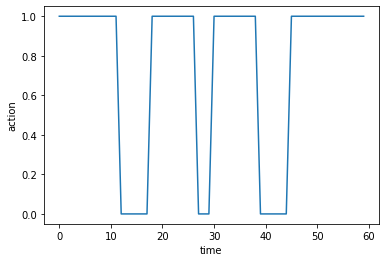

In [14]:
import matplotlib.pyplot as plt 
plt.plot(l)
plt.xlabel('time')
plt.ylabel('action')
#plt.xticks(np.arange(0,60,1))

Json files with timestamps and predicted outputs.

In [0]:
s=[]
for i in range(len(y)):
    s.append([i*3,float(y[i])])

In [0]:
import json
q=json.dumps(s)
with open('/content/timelabelvideo3.json','w') as outfile:
    outfile.write(q)